In [4]:
import os

def get_all_files(directory):
    files_list = []
    for root, _, files in os.walk(directory):
        for file in files:
            files_list.append(os.path.join(root, file))
    return files_list

directory = "Videos"
all_files = get_all_files(directory)

for file in all_files:
    print(file)

Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 01.mkv
Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 02.mkv
Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 03.mkv
Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 04.mkv
Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 05.mkv
Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] N

In [5]:
import cv2

def get_frame_count(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()
    return frame_count

video_path = all_files[0]
frame_count = get_frame_count(video_path)
print(f"Total frames: {frame_count}")


Total frames: 33672


files in the directory:  Videos
number of files:  37
total frame count:  2204371
video path:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 01.mkv
frame count:  33672
###############################
942550
video:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Rebuild Of Evangelion\[Anime Time] Evangelion 1.11 - You Are (Not) Alone.mkv
video frame:  44527


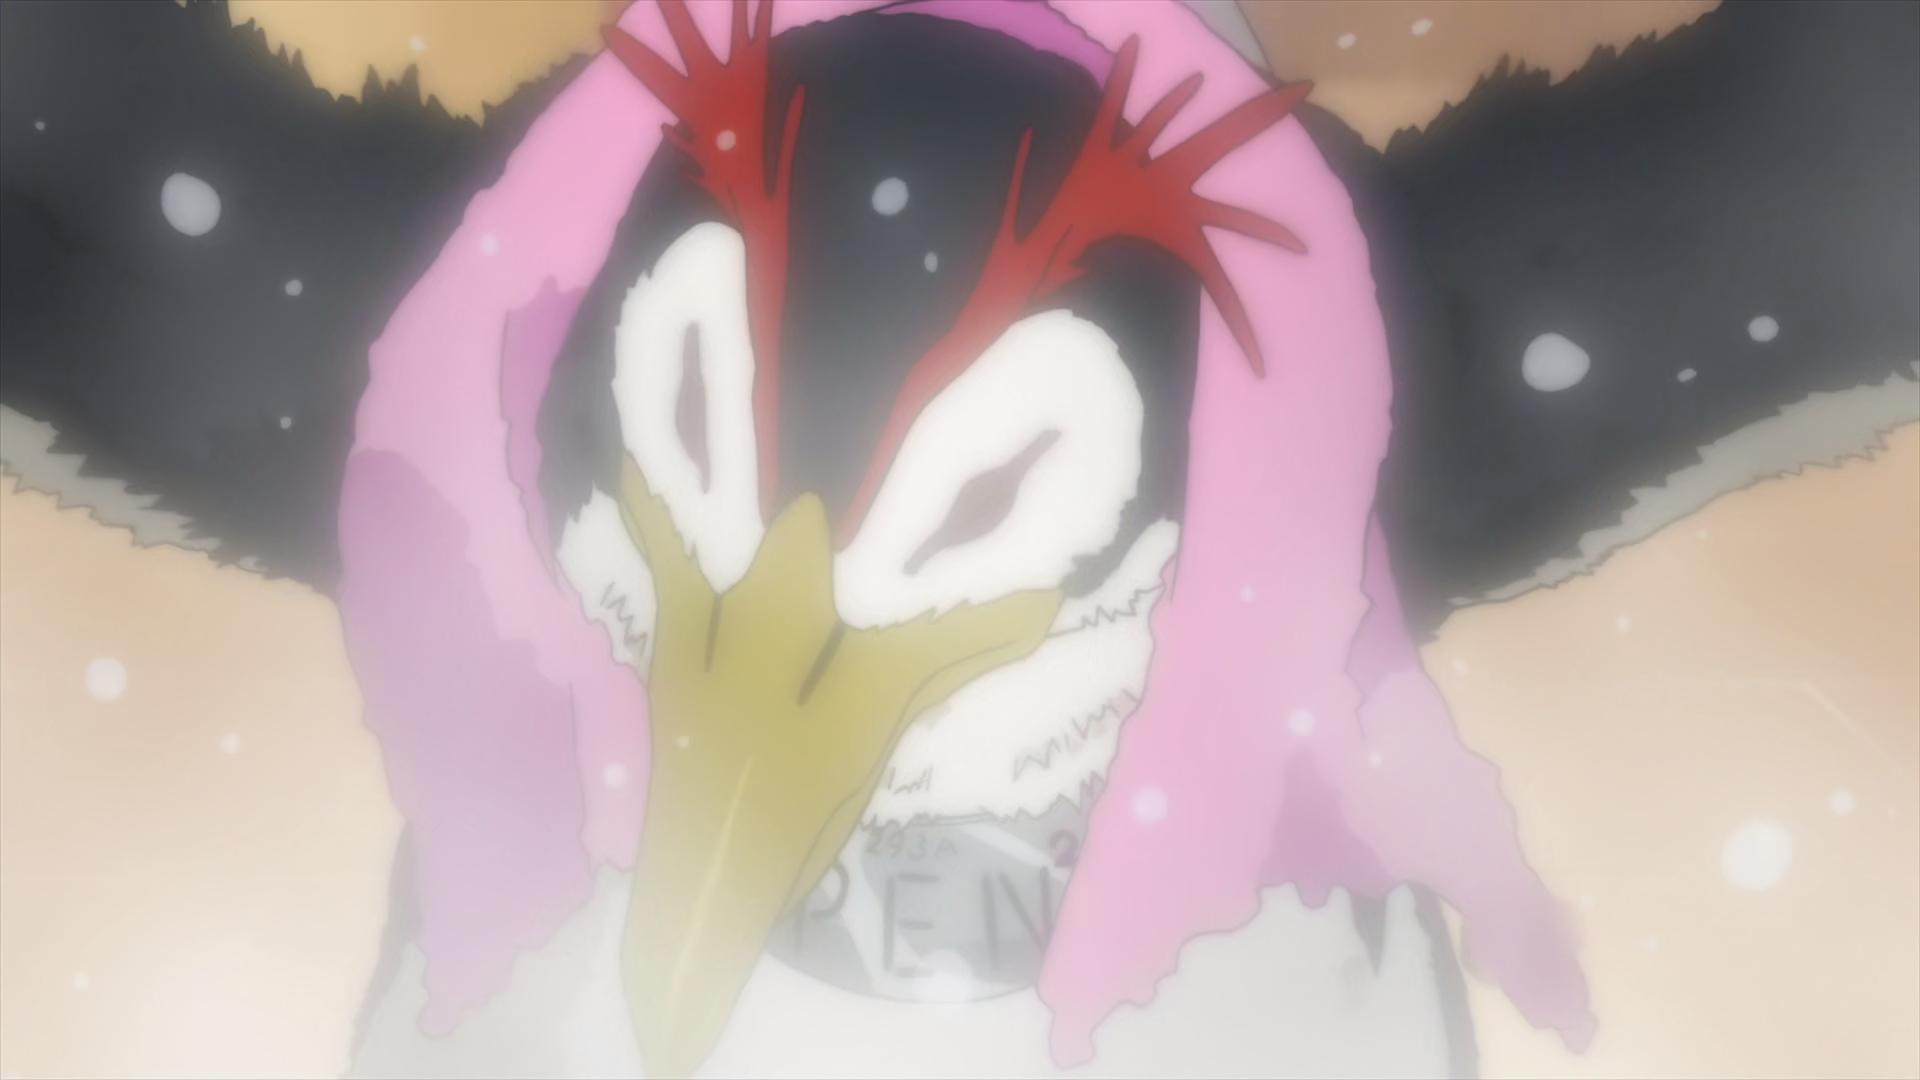

1816973
video:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Revival Of Evangelion\[Anime Time] Neon Genesis Evangelion - The End of Evangelion.mkv
video frame:  7432


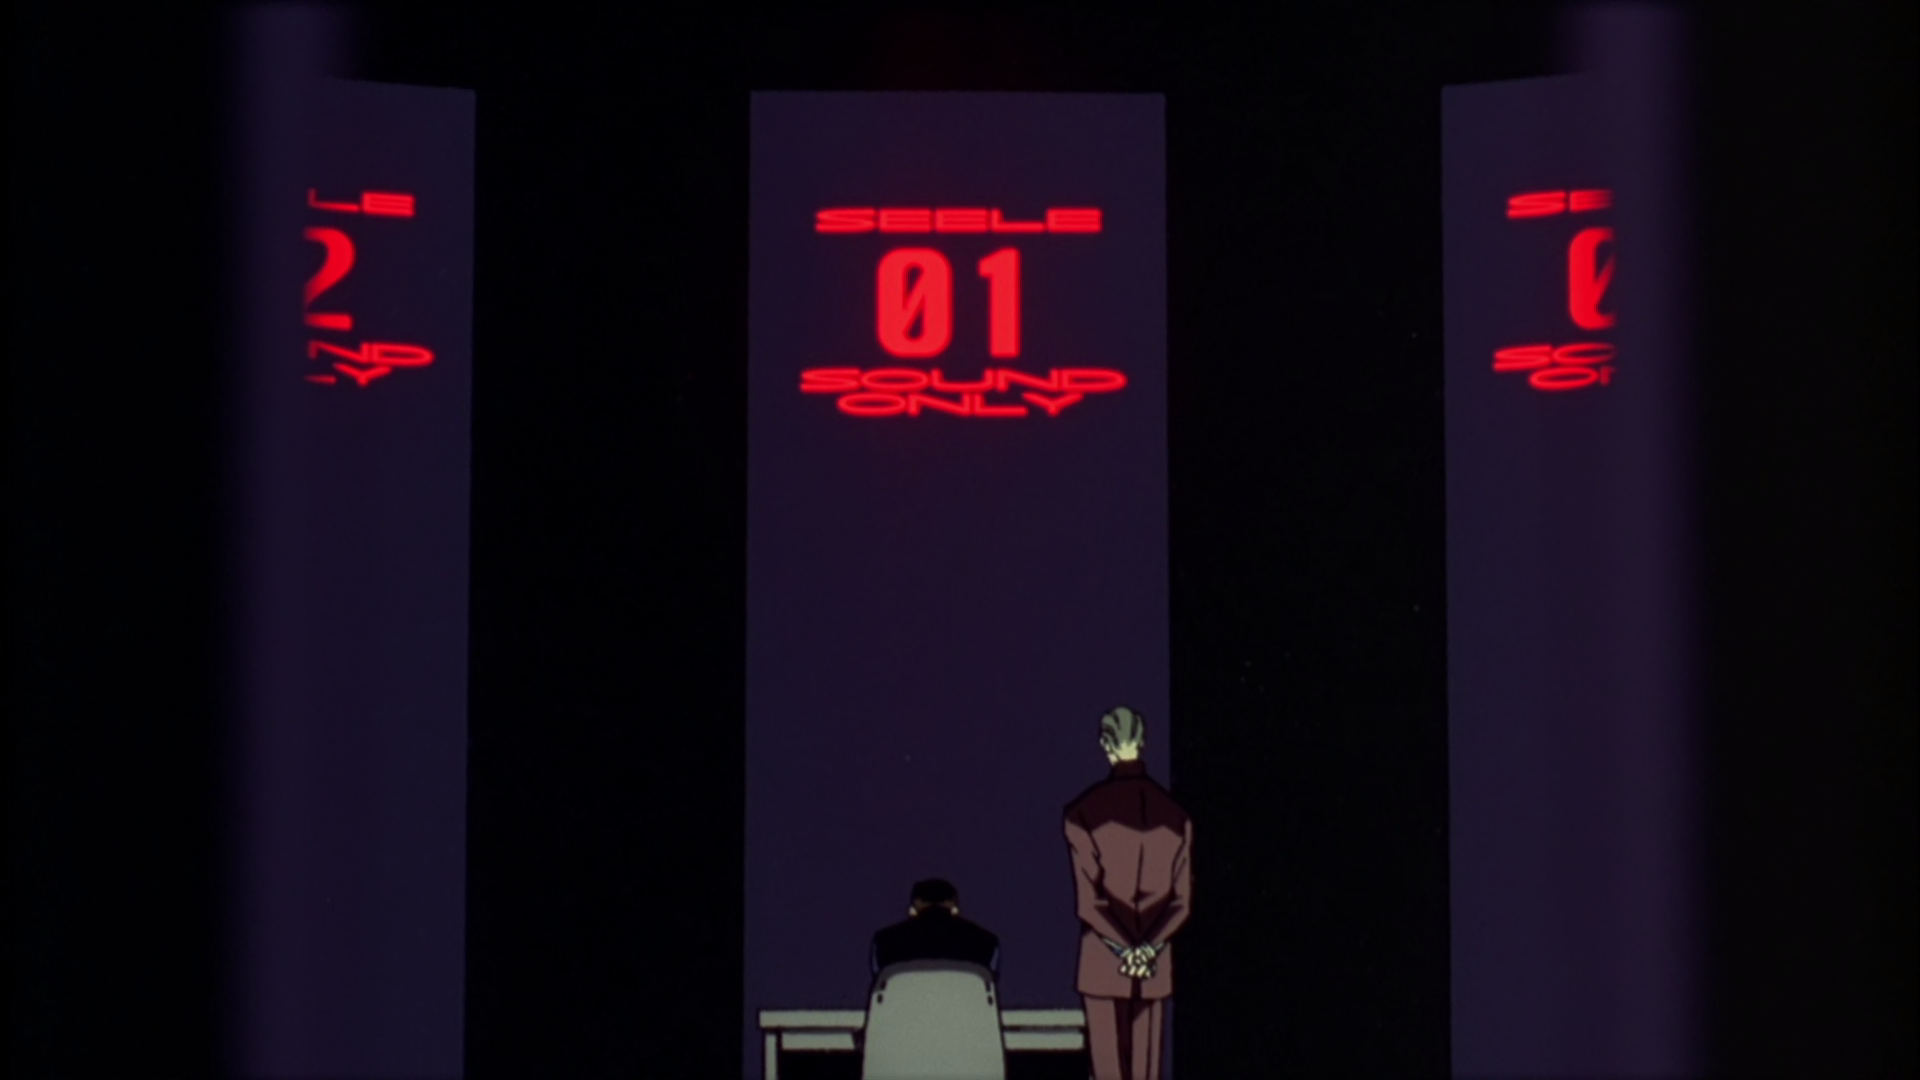

1908683
video:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Revival Of Evangelion\[Anime Time] Neon Genesis Evangelion - The End of Evangelion.mkv
video frame:  99142


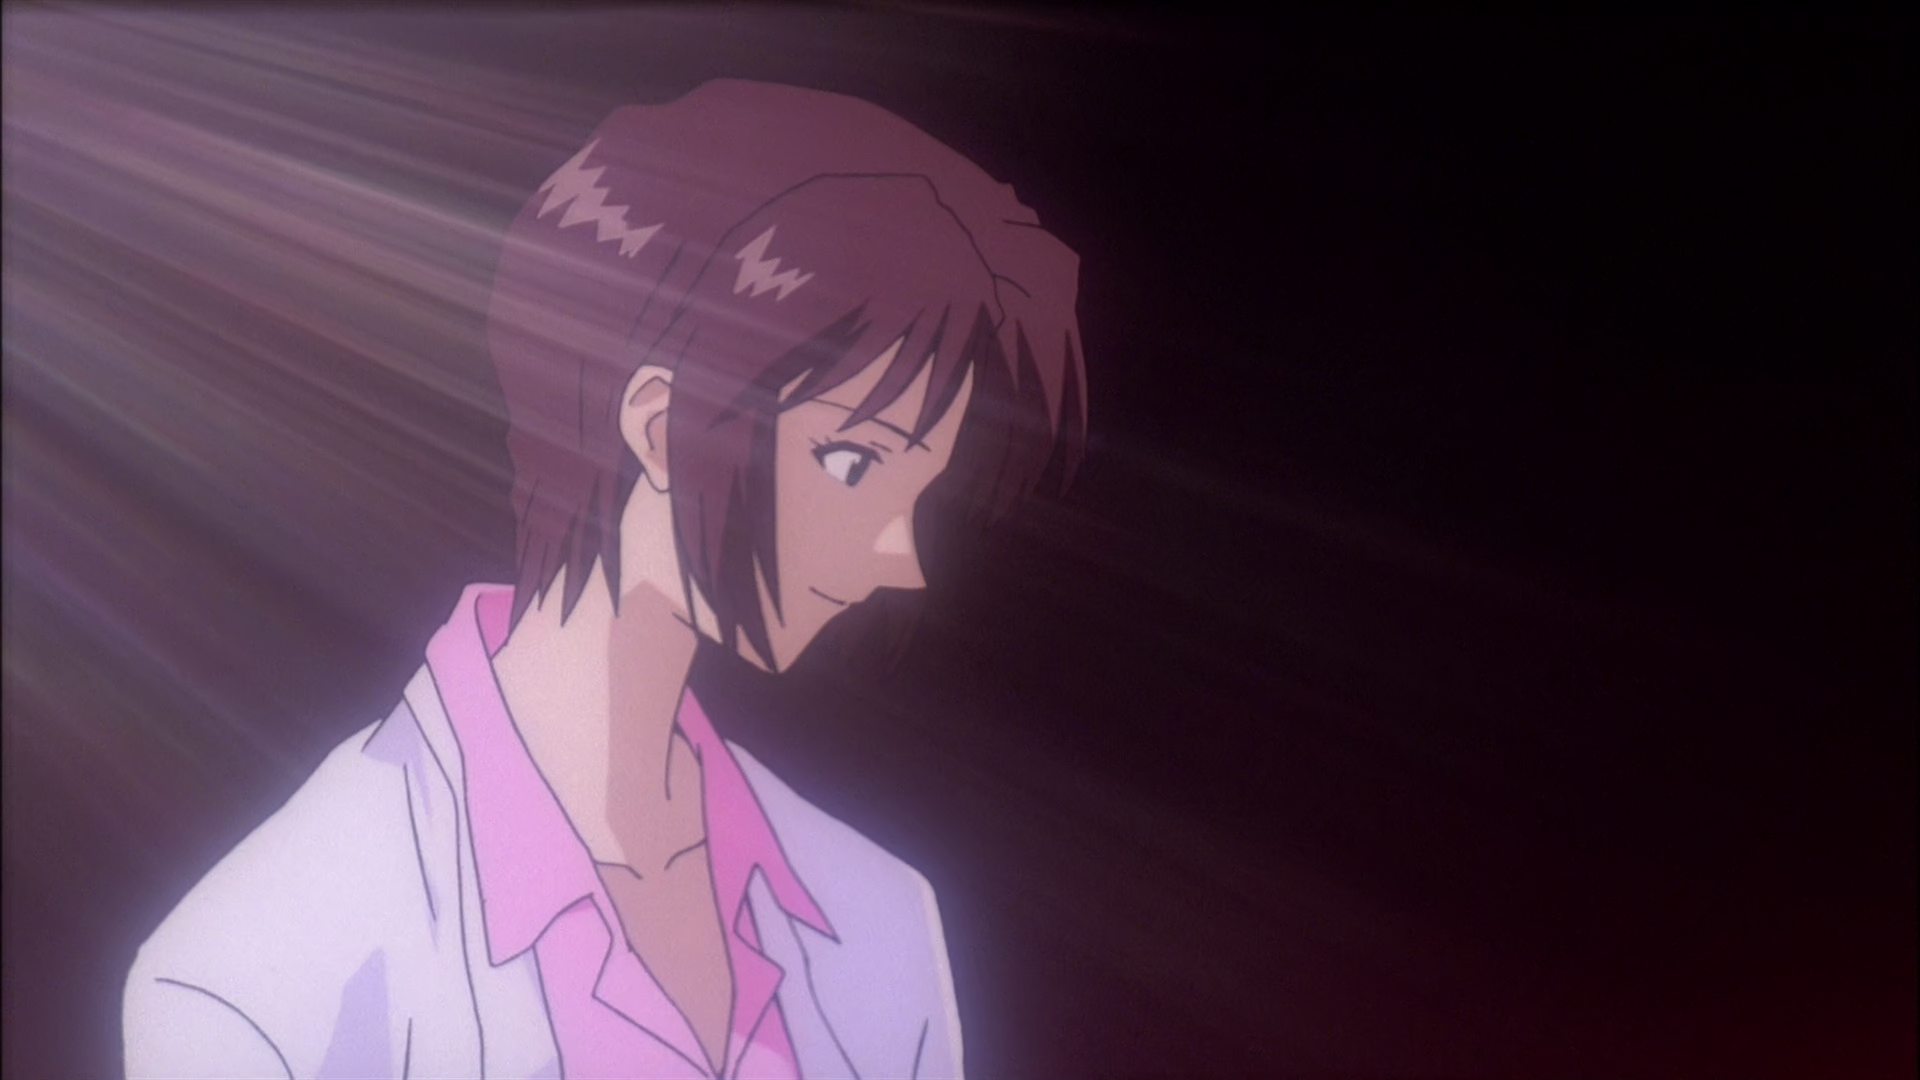

613110
video:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Neon Genesis Evangelion - 19.mkv
video frame:  7437


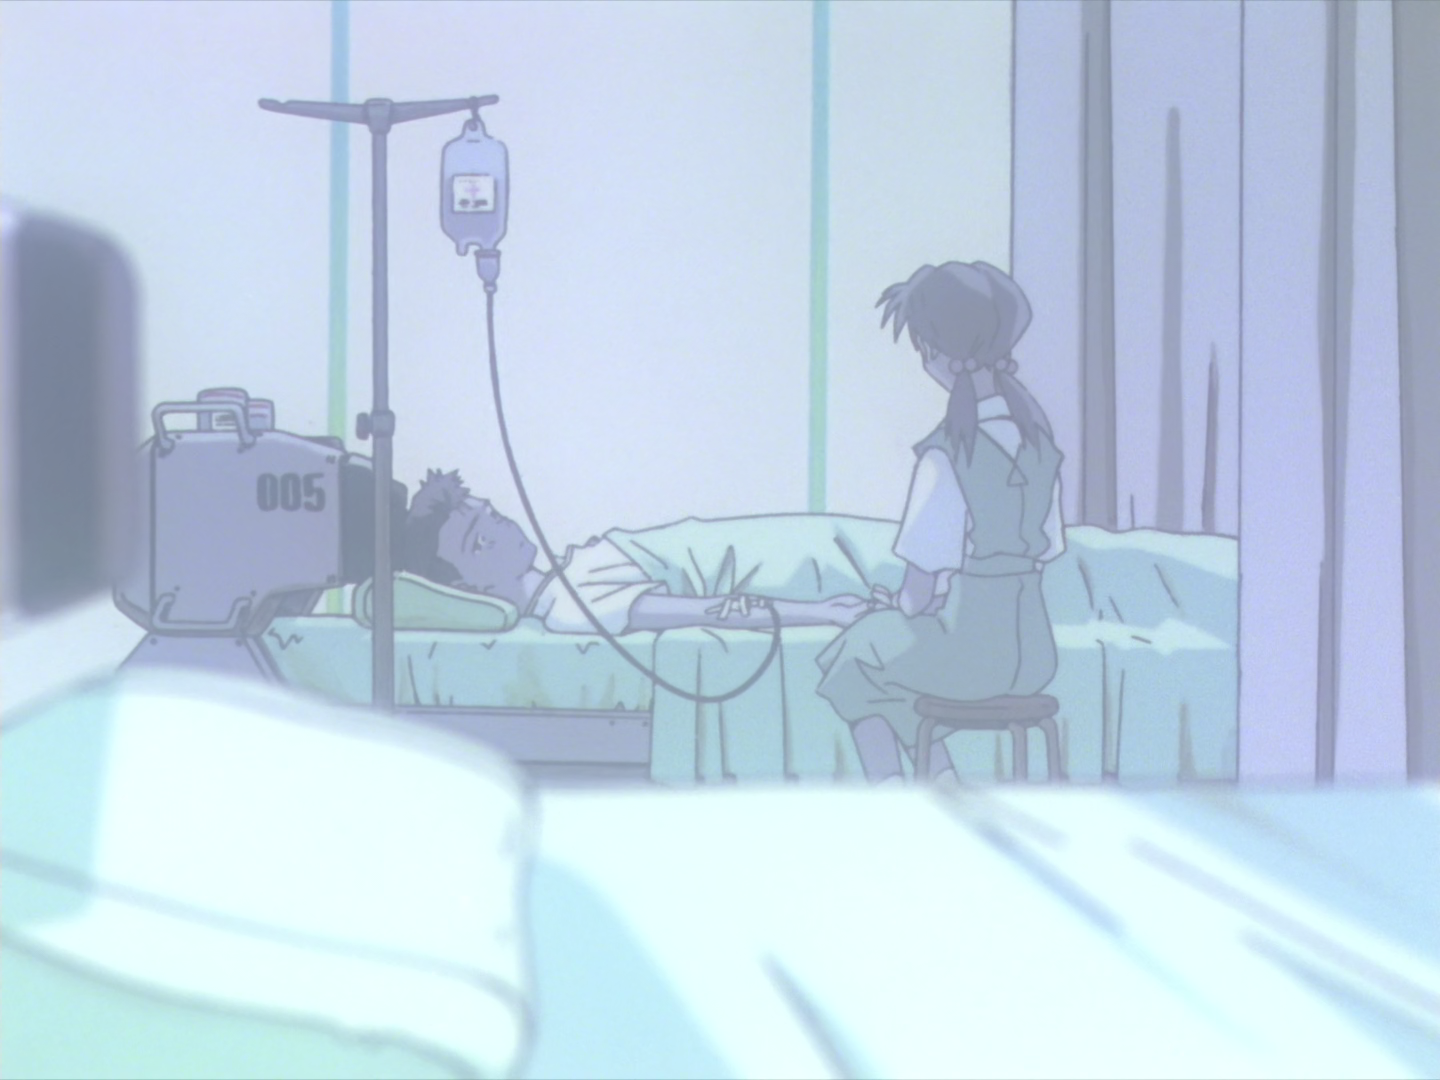

1038890
video:  Videos\[Anime Time] Neon Genesis Evangelion Complete Series [BD] [Dual Audio][1080p][HEVC 10bit x265][AAC][Multi Sub] [Batch]\[Anime Time] Rebuild Of Evangelion\[Anime Time] Evangelion 1.11 - You Are (Not) Alone.mkv
video frame:  140867


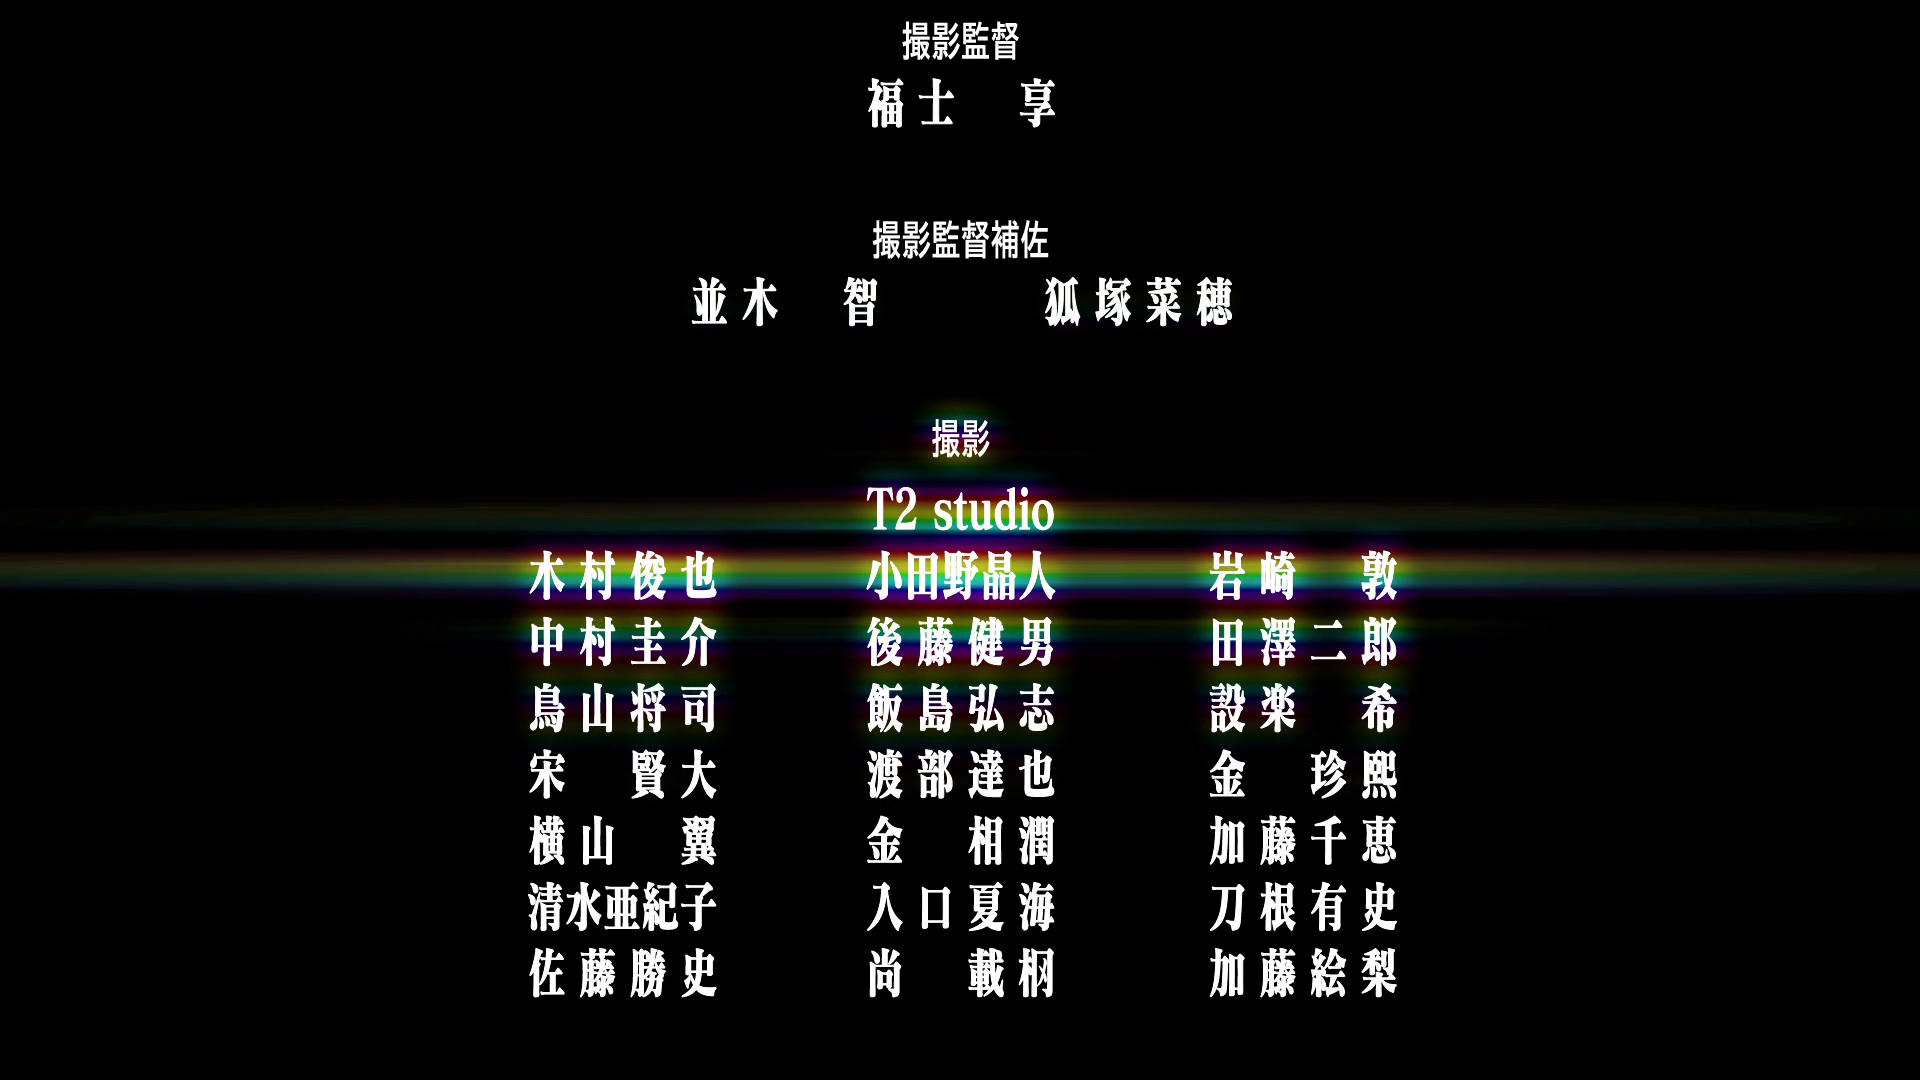

In [41]:
import cv2
import random
import IPython.display
from PIL import Image
import numpy as np

DISPLAY_FRAMES_IPYNB = True


class Videos:
    def __init__(self, directory):
        self.directory = directory
        self.all_files = self.get_all_files(directory)
        self.video_list = [Video(file) for file in self.all_files]
        self.total_frames = sum(video.frame_count for video in self.video_list)

    def get_all_files(self, directory):
        files_list = []
        for root, _, files in os.walk(directory):
            for file in files:
                files_list.append(os.path.join(root, file))
        return files_list

    def print(self):
        print("files in the directory: ", self.directory)
        print("number of files: ", len(self.all_files))
        print("total frame count: ", self.total_frames)

    def get_random_frames(self, n):
        for i in range(n):
            #print("test",i)
            frame = random.randint(1,self.total_frames)
            print(frame)
            for j in range(len(self.video_list)):
                if frame < self.video_list[j].frame_count:
                    print("video: ",self.video_list[j].video_path)
                    print("video frame: ",frame)
                    if (DISPLAY_FRAMES_IPYNB):
                        self.video_list[j].display_frame(frame)
                    break
                else:
                    frame = frame - self.video_list[j].frame_count
                

class Video:
    def __init__(self, video_path):
        self.video_path = video_path
        self.frame_count = get_frame_count(video_path)

    def get_frame_count(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        cap.release()
        return frame_count
    
    def display_frame(self, frame_number):
        cap = cv2.VideoCapture(self.video_path)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)  # Jump to frame

        success, frame = cap.read()
        cap.release()

        if success:
            # Convert BGR (OpenCV) to RGB (PIL)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame)

            # Display in Jupyter
            IPython.display.display(img)
        else:
            print("Error: Could not extract frame.")

    def print(self):
        print("video path: ", self.video_path)
        print("frame count: ", self.frame_count)
    

test = Videos("Videos")
test.print()
test.video_list[0].print()
print("###############################")
test.get_random_frames(5)